# COMP7015: Artificial Intelligence *(Semester 1, 2022/23)*

# Programming Assignment 1

**Instructions:**
1. Fill in your name and student id in the following cell.
2. Write all you codes in this jupyter notebook.
3. You can define your own functions, methods, classes, and variables as you need.
4. Please name your functions and variables in a clear and concise way to maximize the redability of your codes.
5. Name your jupyter notebook in the format of `pa1_<student id>.ipynb` and submit it in Moodle. For example, `pa1_16483715.ipynb`.
6. What you write in this notebook must be your own input. Copying from others and online resources are subject to heavy penalty. Lending and borrowing assignment solutions are both regarded as dishonest behaviours and are subject to heavy penalty and disciplinary actions.
7. You can use the lab materials as a reference but you should not directly copy codes from there. Instead, understand the lab materials fully and implement them on your own for this assignment.

In [1]:
# Fill in your name and student ID
name = 'XU Haohang'
student_id = '22436804'

# Q1. Route finding (15 marks)

Given the following figure, find a route from A to G using BFS, graph DFS, and uniform-cost search.

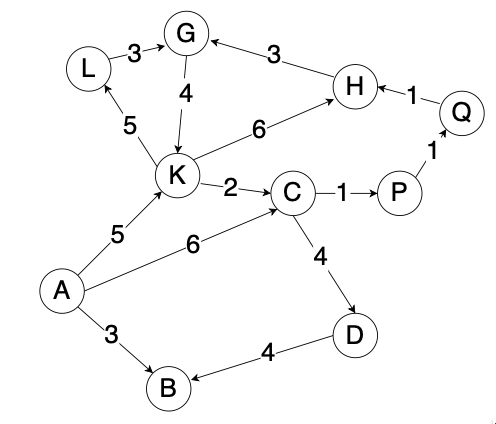

In [98]:
graph= {
    'A':[('C',6),('B',3),('K',5)],
    'B':[],
    'C':[('P',1),('D',4)],
    'K':[('L',5),('H',6)],
    'D':[('B',4)],
    'P':[('Q',1)],
    'Q':[('H',1)],
    'H':[('G',3)],
    'G':[('K',4)],
    'L':[('G',3)]
}


In [99]:
def bfs(graph,starter,end):
    visited=[]
    path= []
    cost = None 
    Nodes = graph[starter]
    path.append([0,starter])
    if starter == end:
        return path
    while len(path)>0:
        pathF = path.pop(0)
        node = pathF[-1]
        if node in visited:
            continue
        visited.append(node)
        for node,cost in graph[node]:
            pathj = pathF.copy()
            pathj.append(node)
            pathj[0]+=cost
            path.append(pathj)
            if node == end:
                return pathj
            
def dfs(graph,starter,end):
    visited=[]
    path= []
    cost = None 
    Nodes = graph[starter]
    path.append([0,starter])
    if starter == end:
        return path
    while len(path)>0:
        pathF = path.pop(-1)
        node = pathF[-1]
        if node in visited:
            continue
        visited.append(node)
        for node,cost in graph[node]:
            pathj = pathF.copy()
            pathj.append(node)
            pathj[0]+=cost
            path.append(pathj)
            if node == end:
                return pathj        

def uniform_cost_search(graph,starter,end):
    visited=[]
    path= []
    cost = None 
    Nodes = graph[starter]
    path.append([0,starter])
    if starter == end:
        return path
    
    while len(path)>0:
        path = sorted(path, key=lambda x: x[0])
        pathF = path.pop(0)
        node = pathF[-1]
        if node in visited:
            continue
        visited.append(node)
        if node == end :
            return pathF
        for node,cost in graph[node]:
            pathj = pathF.copy()
            pathj.append(node)
            pathj[0]+=cost
            path.append(pathj)
        
                 

    
    
    
    
    

In [100]:
print(bfs(graph,'A','G')) 
print(dfs(graph,'A','G'))
print(uniform_cost_search(graph,'A','G'))

[13, 'A', 'K', 'L', 'G']
[14, 'A', 'K', 'H', 'G']
[12, 'A', 'C', 'P', 'Q', 'H', 'G']


# Q2. 8-puzzle (50 marks)

Consider the 8-puzzle problem in the Written Assignment 1.

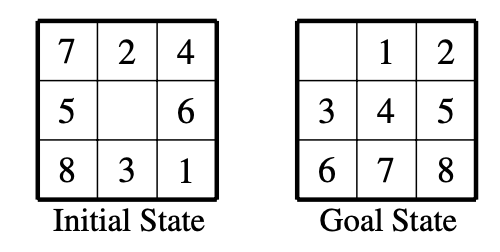

The objective of the puzzle is to slide the tiles horizontally or vertically into the blank space until the configuration matches the goal state. The search space is quite large in 8-puzzle or 16-puzzle. So, we need some help of a good admissible heuristic function to search that space. Here are two commonly used candidates:

- $h_1$ = the number of misplaced tiles (blank not included).
- $h_2$ = the sum of the distances of the tiles from their goal positions.

In this programming assignment, each action has the same cost of 1.

### We can use a nested list to represent a state of the 8-puzzle problem

In [75]:
# Use the nested list to represent a state. 
# For example, the initial state above can be represented by:
initial_state = [[7, 2, 4],
                 [5, 0, 6],
                 [8, 3, 1]]
goal_state = [[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8]]

    

### (1) Define a function named `actions` to return the finite set of actions given a state `s`.

In [180]:
import copy
def actions(s):
    finite_set = []
    row = None
    col = None
    boudaryX = [0,len(s[0])-1]
    boudaryY = [0,len(s)-1]  
    for i in s:
        if 0 in i:
            col = i.index(0)
            row= s.index(i)
    directionY = [item for item in [row+1,row-1] if boudaryX[0]<=item<=boudaryX[-1] ]
    directionX = [item for item in [col+1,col-1] if boudaryY[0]<=item<=boudaryY[-1] ]
    for i in directionX:
        x = copy.deepcopy(s)
        x[row][col]= x[row][i]
        x[row][i] = 0
        finite_set.append(x)
    for i in directionY:
        y = copy.deepcopy(s)
        y[row][col]= y[i][col]
        y[i][col] = 0
        finite_set.append(y)
    return finite_set

In [183]:

print(actions(initial_state))

[[[7, 2, 4], [5, 6, 0], [8, 3, 1]], [[7, 2, 4], [0, 5, 6], [8, 3, 1]], [[7, 2, 4], [5, 3, 6], [8, 0, 1]], [[7, 0, 4], [5, 2, 6], [8, 3, 1]]]


### (2) Define the transition function `result(s, a)` that returns the result of taking action `a` at state `s`.

In [110]:
def result(s,a):
    state = copy.deepcopy(s)
    boudaryX = [0,len(s[0])]
    boudaryY = [0,len(s)]
    mapping={
        'up':['Y',-1],
        'down':['Y',1],
        'left':['X',-1],
        'right':['X',1]
    }
    direction = mapping[a][0]
    action = mapping[a][1]
    for i in state:
        if 0 in i:
            col = i.index(0)
            row= state.index(i)
    if direction == 'X' and boudaryX[0] <=(row+action)<=boudaryX[-1] :
        state[row][col]= state[row][col+action]
        state[row][col+action] = 0
    elif direction == 'Y' and boudaryY[0] <=(col+action)<=boudaryY[-1]:
        state[row][col]= state[row+action][col]
        state[row+action][col] = 0
    else:
        return 'Your action result is out of boundary'
    return state
        
    

In [111]:
print(result(initial_state,'down'))

[[7, 2, 4], [5, 3, 6], [8, 0, 1]]


### (3) Define a function `heuristic_num_misplaced(s)` that computes $h_1$ for a state `s`. 

In [157]:
def heuristic_num_misplaced(s):
    match=[]
    for ind in range(len(s)):
        match.extend([i for i, j in zip(s[ind], goal_state[ind]) if i == j]) 
    if 0 in match:
        return 9-len(match)
    else:
        return 8-len(match

In [159]:
print(heuristic_num_misplaced(initial_state))

8


### (4) Define a function `heuristic_manhattan_distance(s)` that computes $h_2$ for a state `s`.

In [1202]:
def heuristic_manhattan_distance(s):
    h = 0
    for i in range(len(s)) :
        for j in range(len(s[i])):
            if s[i][j]==0:
                continue
            destX = int(s[i][j]/3)
            destY = int(s[i][j]%3)
            distance = abs(i-destX)+abs(j-destY)
            h = distance+h
    return h

In [1205]:
heuristic_manhattan_distance(initial_state) 

12

### (5) Perform greedy search using $h_1$ and $h_2$, respectively, to find a solution from the given initial state to the goal state. Print out the cost of the solutions found by using the two heuristic functions.

In [1208]:
def greedy_search(starter,goal,heuristics_function):
    paths = [[0,starter]]
    visited = []
    while len(paths)>0:
        frontier_heuristics = []
        for x in paths: 
            frontier_heuristics.append(heuristics_function(x[-1]))
        min_value = frontier_heuristics.index(min(frontier_heuristics))
        path = paths.pop(min_value)
        node = path[-1] 
        
        if node in visited:  
            continue    
        action = actions(node)
        for next_node in action:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + 1
            
            if next_node in visited or new_path in paths:
                continue  
            
            if next_node == goal:
                goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_path, goal_cost  #
            else:
                paths.append(new_path)  
        
        visited.append(node)
    return None

In [1209]:
goal_path,goal_cost = greedy_search(initial_state,goal_state,heuristic_num_misplaced)
print(f'use h1 heuristic function\n cost: {goal_cost} \n path:{goal_path}')
goal_path,goal_cost = greedy_search(initial_state,goal_state,heuristic_manhattan_distance)
print(f'use h2 heuristic function\n cost: {goal_cost} \n path:{goal_path}')

use h1 heuristic function
 cost: 54 
 path:[[[1, 2, 8], [4, 0, 7], [6, 5, 3]], [[1, 0, 8], [4, 2, 7], [6, 5, 3]], [[0, 1, 8], [4, 2, 7], [6, 5, 3]], [[4, 1, 8], [0, 2, 7], [6, 5, 3]], [[4, 1, 8], [2, 0, 7], [6, 5, 3]], [[4, 1, 8], [2, 7, 0], [6, 5, 3]], [[4, 1, 8], [2, 7, 3], [6, 5, 0]], [[4, 1, 8], [2, 7, 3], [6, 0, 5]], [[4, 1, 8], [2, 0, 3], [6, 7, 5]], [[4, 1, 8], [2, 3, 0], [6, 7, 5]], [[4, 1, 0], [2, 3, 8], [6, 7, 5]], [[4, 0, 1], [2, 3, 8], [6, 7, 5]], [[0, 4, 1], [2, 3, 8], [6, 7, 5]], [[2, 4, 1], [0, 3, 8], [6, 7, 5]], [[2, 4, 1], [3, 0, 8], [6, 7, 5]], [[2, 4, 1], [3, 8, 0], [6, 7, 5]], [[2, 4, 1], [3, 8, 5], [6, 7, 0]], [[2, 4, 1], [3, 8, 5], [6, 0, 7]], [[2, 4, 1], [3, 0, 5], [6, 8, 7]], [[2, 0, 1], [3, 4, 5], [6, 8, 7]], [[2, 1, 0], [3, 4, 5], [6, 8, 7]], [[2, 1, 5], [3, 4, 0], [6, 8, 7]], [[2, 1, 5], [3, 4, 7], [6, 8, 0]], [[2, 1, 5], [3, 4, 7], [6, 0, 8]], [[2, 1, 5], [3, 0, 7], [6, 4, 8]], [[2, 1, 5], [3, 7, 0], [6, 4, 8]], [[2, 1, 0], [3, 7, 5], [6, 4, 8]], [[2, 0, 1],

### (6) Perform A* search using $h_1$ and $h_2$, respectively, to find a solution from the given initial state to the goal state. Print out the cost of the solutions found by using the two heuristic functions.

In [1213]:
def a_star_search(starter,goal,heuristics_function):
    paths = [[0,starter]]
    visited = []
    num_moves=0
    num_nodes=0
    while len(paths)>0:
        cost_heuristics = []
        for i in paths: 
            cost_heuristics.append(heuristics_function(i[-1])+i[0])
        min_value = cost_heuristics.index(min(cost_heuristics))
        path = paths.pop(min_value)
        node = path[-1] 
        
        if node in visited:  
            continue    
        action = actions(node)
        num_moves+= len(action)
        num_nodes+=1
        for nx_node in action:
            pathj = path.copy()
            pathj.append(nx_node)
            pathj[0] = pathj[0] + 1
            if nx_node in visited or pathj in paths:
                continue  
            if nx_node == goal:
                pathg = pathj[1:]
                branch_factor = num_moves/num_nodes     #calculate average branching factor
                total_cost = pathj[0]
                return pathg, total_cost,branch_factor  
            else:
                paths.append(pathj)  
        visited.append(node)
    return None

In [1214]:
goal_path,goal_cost,branch_factor = a_star_search(initial_state,goal_state,heuristic_num_misplaced)
print(f'use h1 heuristic function\n cost: {goal_cost} \n path:{goal_path}')
goal_path,goal_cost,branch_factor = a_star_search(initial_state,goal_state,heuristic_manhattan_distance)
print(f'use h2 heuristic function\n cost: {goal_cost} \n path:{goal_path}')

use h1 heuristic function
 cost: 18 
 path:[[[1, 2, 8], [4, 0, 7], [6, 5, 3]], [[1, 2, 8], [0, 4, 7], [6, 5, 3]], [[1, 2, 8], [6, 4, 7], [0, 5, 3]], [[1, 2, 8], [6, 4, 7], [5, 0, 3]], [[1, 2, 8], [6, 4, 7], [5, 3, 0]], [[1, 2, 8], [6, 4, 0], [5, 3, 7]], [[1, 2, 0], [6, 4, 8], [5, 3, 7]], [[1, 0, 2], [6, 4, 8], [5, 3, 7]], [[1, 4, 2], [6, 0, 8], [5, 3, 7]], [[1, 4, 2], [6, 3, 8], [5, 0, 7]], [[1, 4, 2], [6, 3, 8], [0, 5, 7]], [[1, 4, 2], [0, 3, 8], [6, 5, 7]], [[1, 4, 2], [3, 0, 8], [6, 5, 7]], [[1, 4, 2], [3, 5, 8], [6, 0, 7]], [[1, 4, 2], [3, 5, 8], [6, 7, 0]], [[1, 4, 2], [3, 5, 0], [6, 7, 8]], [[1, 4, 2], [3, 0, 5], [6, 7, 8]], [[1, 0, 2], [3, 4, 5], [6, 7, 8]], [[0, 1, 2], [3, 4, 5], [6, 7, 8]]]
use h2 heuristic function
 cost: 18 
 path:[[[1, 2, 8], [4, 0, 7], [6, 5, 3]], [[1, 2, 8], [0, 4, 7], [6, 5, 3]], [[1, 2, 8], [6, 4, 7], [0, 5, 3]], [[1, 2, 8], [6, 4, 7], [5, 0, 3]], [[1, 2, 8], [6, 4, 7], [5, 3, 0]], [[1, 2, 8], [6, 4, 0], [5, 3, 7]], [[1, 2, 0], [6, 4, 8], [5, 3, 7]], [[

## Part II. (20 marks)

In this part, we are going to compare the two heuristics. In order to make the comparision more stable, we need to first randomly generate more initial states. To make sure that the generated initial state has solutions, we can start from the goal state and make random moves to generate an initial state.

### (7) Define a function `generate_random_initial_state` that generates an initial state by making `n` random moves from the goal state.

In [263]:
import random 
def generate_random_initial_state(n):
    action= actions(goal_state)            #start from goal_state
    initial_state = []
    for i in range(n):
        sizes = len(action)
        index = random.randint(0,sizes-1)  #conduct random moves 
        if i == n-1:
            action = action[index]
            continue
        action = actions(action[index])
    initial_state = [action]
    return initial_state

In [269]:
print(generate_random_initial_state(8))

[[[3, 1, 2], [4, 0, 5], [6, 7, 8]]]


### (8) Generate 30 random initial states using the functions you defined.

In [273]:
rd_initial_states  = []
for i  in range(30):
    rd_initial_states.extend(generate_random_initial_state(25))

In [274]:
print(rd_initial_states)

[[[1, 0, 4], [6, 5, 2], [7, 3, 8]], [[1, 5, 4], [3, 2, 0], [6, 7, 8]], [[1, 4, 2], [3, 7, 5], [6, 0, 8]], [[3, 7, 2], [4, 8, 5], [6, 0, 1]], [[3, 0, 4], [5, 1, 2], [6, 7, 8]], [[1, 4, 2], [0, 7, 5], [3, 6, 8]], [[1, 2, 5], [3, 4, 8], [6, 0, 7]], [[4, 7, 2], [1, 6, 5], [3, 0, 8]], [[3, 0, 2], [7, 1, 5], [4, 6, 8]], [[1, 4, 2], [3, 7, 5], [6, 0, 8]], [[1, 2, 5], [3, 4, 0], [6, 7, 8]], [[6, 3, 2], [7, 5, 8], [4, 0, 1]], [[4, 3, 2], [0, 1, 5], [6, 7, 8]], [[3, 4, 1], [6, 8, 2], [7, 0, 5]], [[1, 2, 5], [0, 3, 8], [6, 4, 7]], [[1, 4, 2], [3, 5, 0], [6, 7, 8]], [[3, 1, 2], [0, 4, 5], [6, 7, 8]], [[4, 0, 2], [5, 1, 8], [6, 3, 7]], [[1, 0, 2], [3, 5, 8], [4, 6, 7]], [[3, 0, 1], [4, 5, 2], [6, 7, 8]], [[3, 1, 2], [4, 7, 0], [6, 8, 5]], [[1, 2, 5], [6, 3, 4], [7, 0, 8]], [[3, 0, 1], [4, 5, 2], [6, 7, 8]], [[3, 1, 2], [0, 4, 5], [6, 7, 8]], [[1, 7, 4], [3, 8, 2], [6, 0, 5]], [[6, 3, 2], [0, 1, 5], [7, 4, 8]], [[1, 0, 2], [3, 7, 5], [6, 8, 4]], [[3, 4, 1], [6, 2, 0], [7, 8, 5]], [[5, 3, 4], [1, 2, 

### (9) Use A* search to find solutions for the random initial states you generated using the two heuristic functions. Compute the branching factors $b^*_1$ and $b^*_2$ for the two heuristic functions, respectively.

In [285]:
path_for_h1,cost_for_h1,b1 = a_star_search(rd_initial_states[0],goal_state,heuristic_num_misplaced)

path_for_h2,cost_for_h2,b2 = a_star_search(rd_initial_states[0],goal_state,heuristic_manhattan_distance)


In [286]:
print(f'use h1 heuristic function\n cost: {cost_for_h1} \n path:{path_for_h1} \n branch_factor:{b1}')
print(f'use h2 heuristic function\n cost: {cost_for_h2} \n path:{path_for_h2} \n branch_factor:{b2}')

use h1 heuristic function
 cost: 9 
 path:[[[1, 0, 4], [6, 5, 2], [7, 3, 8]], [[1, 4, 0], [6, 5, 2], [7, 3, 8]], [[1, 4, 2], [6, 5, 0], [7, 3, 8]], [[1, 4, 2], [6, 0, 5], [7, 3, 8]], [[1, 4, 2], [6, 3, 5], [7, 0, 8]], [[1, 4, 2], [6, 3, 5], [0, 7, 8]], [[1, 4, 2], [0, 3, 5], [6, 7, 8]], [[1, 4, 2], [3, 0, 5], [6, 7, 8]], [[1, 0, 2], [3, 4, 5], [6, 7, 8]], [[0, 1, 2], [3, 4, 5], [6, 7, 8]]] 
 branch_factor:2.9583333333333335
use h2 heuristic function
 cost: 9 
 path:[[[1, 0, 4], [6, 5, 2], [7, 3, 8]], [[1, 4, 0], [6, 5, 2], [7, 3, 8]], [[1, 4, 2], [6, 5, 0], [7, 3, 8]], [[1, 4, 2], [6, 0, 5], [7, 3, 8]], [[1, 4, 2], [6, 3, 5], [7, 0, 8]], [[1, 4, 2], [6, 3, 5], [0, 7, 8]], [[1, 4, 2], [0, 3, 5], [6, 7, 8]], [[1, 4, 2], [3, 0, 5], [6, 7, 8]], [[1, 0, 2], [3, 4, 5], [6, 7, 8]], [[0, 1, 2], [3, 4, 5], [6, 7, 8]]] 
 branch_factor:2.8333333333333335


### (10) Which of the two heuristic functions is better? Use a markdown cell to describe your observations and explain the reasons.

Heuristic_manhattan_distance is better.

Firstly, a smaller branch_factor can be achieved by using manhattan_distance heuristic function. We all know that a bigger branch_factor tend to take more computation due to the increasing number of nodes.
Secondly, accoding to the definition of heuristic function, manhattan_distance can better estimate the true cost. And the distance changes more frequently than the number of misplaced tiles after every move. So it can provide more informative direction. 

## Q3. Machine learning (40 marks)

## Part I. (20 marks)
We use the watermelon dataset as given below for this taks. Run the following cells to prepare the data.

In [287]:
import pandas as pd

In [288]:
# Do NOT modify this cell
raw_data = [
    ['color', 'green', 'dark', 'dark', 'green', 'light', 'green', 'dark', 'dark', 'dark', 'green', 'light', 'light', 'green', 'light', 'dark', 'light', 'green'],
    ['root', 'curly', 'curly', 'curly', 'curly', 'curly', 'slightly curly', 'slightly curly', 'slightly curly', 'slightly curly', 'straight', 'straight', 'curly', 'slightly curly', 'slightly curly', 'slightly curly', 'curly', 'curly'],
    ['sound', 'muffled', 'dull', 'muffled', 'dull', 'muffled', 'muffled', 'muffled', 'muffled', 'dull', 'crisp', 'crisp', 'muffled', 'muffled', 'dull', 'muffled', 'muffled', 'dull'],
    ['texture', 'clear', 'clear', 'clear', 'clear', 'clear', 'clear', 'slightly blurry', 'clear', 'slightly blurry', 'clear', 'blurry', 'blurry', 'slightly blurry', 'slightly blurry', 'clear', 'blurry', 'slightly blurry'],
    ['umbilicus', 'hollow', 'hollow', 'hollow', 'hollow', 'hollow', 'slightly hollow', 'slightly hollow', 'slightly hollow', 'slightly hollow', 'flat', 'flat', 'flat', 'hollow', 'hollow', 'slightly hollow', 'flat', 'slightly hollow'],
    ['surface', 'hard', 'hard', 'hard', 'hard', 'hard', 'soft', 'soft', 'hard', 'hard', 'soft', 'hard', 'soft', 'hard', 'hard', 'soft', 'hard', 'hard'],
    ['density', '0.697', '0.774', '0.634', '0.608', '0.556', '0.403', '0.481', '0.437', '0.666', '0.243', '0.245', '0.343', '0.639', '0.657', '0.36', '0.593', '0.719'],
    ['suger', '0.46', '0.376', '0.264', '0.318', '0.215', '0.237', '0.149', '0.211', '0.091', '0.267', '0.057', '0.099', '0.161', '0.198', '0.37', '0.042', '0.103'],
    ['label', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
]

data_dict = {x[0]: x[1:] for x in raw_data}

watermelon = pd.DataFrame(data_dict)
watermelon['density'] = pd.to_numeric(watermelon['density'])
watermelon['suger'] = pd.to_numeric(watermelon['suger'])

In [376]:
watermelon

,color,root,sound,texture,umbilicus,surface,density,suger,label
0,green,curly,muffled,clear,hollow,hard,0.697,0.460,yes
1,dark,curly,dull,clear,hollow,hard,0.774,0.376,yes
2,dark,curly,muffled,clear,hollow,hard,0.634,0.264,yes
3,green,curly,dull,clear,hollow,hard,0.608,0.318,yes
4,light,curly,muffled,clear,hollow,hard,0.556,0.215,yes
5,green,slightly curly,muffled,clear,slightly hollow,soft,0.403,0.237,yes
6,dark,slightly curly,muffled,slightly blurry,slightly hollow,soft,0.481,0.149,yes
7,dark,slightly curly,muffled,clear,slightly hollow,hard,0.437,0.211,yes
8,dark,slightly curly,dull,slightly blurry,slightly hollow,hard,0.666,0.091,no
9,green,straight,crisp,clear,flat,soft,0.243,0.267,no


### (1) Write a function named `compute_entropy` that computes the entropy given a dataset `df` (a `pd.DataFrame` object) which has a column named `label` to indicate the labels of each data sample.

In [377]:
import math
def compute_entropy(df,label,feature=None):
    Ent = 0
    if feature == None :
        dicts =df[label].value_counts().to_dict()
        total =df[label].count()
        for i in dicts.values() :
            Ent+= (i/total)*math.log((i/total),2)
        return -Ent
    else:
        Ent_feature = {}
        dicts =df[feature].value_counts().to_dict()
        for option in dicts.keys():
            new_df = df[df[feature]==option]
            Ent_feature[option] =compute_entropy(new_df,label)
        return Ent_feature
            
            
            
        

In [389]:
print(compute_entropy(watermelon,'label'))

0.9975025463691153


### (2) Write a function namd `compute_gain_cat` that computes the information gain given a dataset `df` (a `pd.DataFrame` object) and the name of a categorical feature `feature`.

In [381]:
def compute_gain_cat(df,label,feature):
    Ent_label = compute_entropy(df,label)
    Ent_feature = compute_entropy(df,label,feature)
    info_gain = 0
    tmp = 0
    total = df[feature].count()
    dicts = df[feature].value_counts().to_dict()
    for option in dicts.keys():
        tmp+=(dicts[option]/total)*Ent_feature[option]
    info_gain = Ent_label - tmp
    return info_gain
    
    

In [388]:
compute_gain_cat(watermelon,'label','color')

0.10812516526536531

### (3) Write a function named `compute_gain_num` that computes the information gain given a dataset `df`  (a `pd.DataFrame` object) and the name of a numerical feature `feature`.

In [580]:
def compute_gain_num(df,label,feature):
    df_num = df[feature]
    df_tmp = df.copy()
    gain = []
    df_num.drop_duplicates() # drop duplicates to sort
    vals=(df_num.values.tolist())
    vals.sort()
    for j in range(len(vals)-1):
        vals[j]= (vals[j]+vals[j+1])/2
    vals.pop(-1)  #generate midpoint of the intervals
    for i in vals:
        df_tmp = df.copy()
        df_tmp[feature][df_tmp[feature]>i]='A'
        df_tmp[feature][df_tmp[feature]!='A']='B'
        gain.append(compute_gain_cat(df_tmp,label,feature))
    return max(gain)

In [581]:
print(compute_gain_num(watermelon,'label','density'))
print(compute_gain_num(watermelon,'label','suger'))

0.2624392604045631
0.34929372233065203


### (4) Write a function namd `compute_ratio` that computes the information gain ratio given a dataset `df` (a `pd.DataFrame` object) and the name of a categorical feature `feature`.

In [587]:
def compute_ratio(df,label,feature):
    IV = 0 
    info_gain = compute_gain_cat(df,label,feature)
    total = df[feature].count()
    dicts = df[feature].value_counts().to_dict()
    for i in dicts.keys():
        IV+= (dicts[i]/total)*math.log(dicts[i]/total,2)
    return info_gain/-IV

In [589]:
print(compute_ratio(watermelon,'label','root'))

0.1017593980537369


## Part II. (15 marks)
We use the `wine` dataset as given below for this taks. The description of the dataset is as below. See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine for detailed documentation.

### Wine recognition dataset


**Data Set Characteristics:**

    :Number of Instances: 178 (around 50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

Original Owners: 

Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies,
Via Brigata Salerno, 16147 Genoa, Italy.

Citation:

Lichman, M. (2013). UCI Machine Learning Repository
[https://archive.ics.uci.edu/ml]. Irvine, CA: University of California,
School of Information and Computer Science. 

.. topic:: References

  (1) S. Aeberhard, D. Coomans and O. de Vel, 
  Comparison of Classifiers in High Dimensional Settings, 
  Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of  
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Technometrics). 

  The data was used with many others for comparing various 
  classifiers. The classes are separable, though only RDA 
  has achieved 100% correct classification. 
  (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) 
  (All results using the leave-one-out technique) 

  (2) S. Aeberhard, D. Coomans and O. de Vel, 
  "THE CLASSIFICATION PERFORMANCE OF RDA" 
  Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of 
  Mathematics and Statistics, James Cook University of North Queensland. 
  (Also submitted to Journal of Chemometrics).

**Run the following cells to prepare the data.**

In [590]:
import sklearn
from sklearn.datasets import load_wine

In [591]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [592]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [932]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### (1) Use the sklearn built-in LogisticRegression to classify the class label with OvR method, use five-fold cross validation and evaluate the test performance using accuracy, macro-F1, and micro-F1 scores.
*Note: You can specify `multi_class='ovr'` to use OvR method for multiclass classification in LogisticRegression.*

In [619]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [620]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]  
    y_train, y_test = y.values[train_index], y.values[test_index]
    model =  LogisticRegression(random_state=14,multi_class='ovr',max_iter=10000000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('accuracy',accuracy_score(y_test, y_pred))
    print('macro-F1',f1_score(y_test, y_pred, average='macro'))
    print('micro-F1',f1_score(y_test, y_pred, average='micro'))


accuracy 0.9722222222222222
macro-F1 0.9636062861869313
micro-F1 0.9722222222222222
accuracy 0.9166666666666666
macro-F1 0.9202683726010298
micro-F1 0.9166666666666666
accuracy 0.9722222222222222
macro-F1 0.9759139784946237
micro-F1 0.9722222222222222
accuracy 0.9714285714285714
macro-F1 0.9665831244778613
micro-F1 0.9714285714285714
accuracy 0.9714285714285714
macro-F1 0.9709618874773139
micro-F1 0.9714285714285714


### (2) Mannuly train logistic regression models using OvR methods for this dataset, use five-fold cross validation.

In [1120]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_wine
class LogisticRegression():
    def __init__(self,lr,iteration):
        self.lr = lr    
        self.iteration = iteration 
        
    def fit(self, x, y) :      
        x['b']=1    # add a column eq to 1    
        self.m, self.n = x.shape        
        self.w = np.zeros(self.n) 
        self.x = x
        self.y = y
        cost_value = self.costfunction() 
        for i in range(self.iteration):
            #if i != 1 and abs(cost_value - self.costfunction()) <= 0.000001:    #stop  when cost changes little
            #    print(cost_value)
          #      break
          #  elif i ==1 :
         #       self.weight_update()
         #   else :
                cost_value = self.costfunction()
                self.weight_update()    
                                
    def sigmoid(self,x):
        
        return 1/(1+np.exp(-np.dot(x,self.w)))
    
    def costfunction(self):
        
        cost = -(1 / self.m)* (self.y * np.log(self.sigmoid(self.x)) + (1 - self.y) * np.log(1 - self.sigmoid(self.x)))
        return  np.sum(cost) 
   
    
    def gradient_computation(self):
        #print(self.w.info())
        
        
        gradient =  1 / self.m *(self.sigmoid(self.x)-self.y).dot(self.x)
        return  gradient.values
     
    def predict(self,X_test):
        X_test['b']=1
        result = self.sigmoid(X_test)
        result[result>0.5] = 1 
        result[result<0.5] = 0
        return result
    
    
    def weight_update(self):
        self.w = self.w -self.lr*self.gradient_computation()


In [1121]:
class utils():
    
    @staticmethod
    def cross_validation(fold,X,y):
        X_train =[]
        X_test = []
        Y_train =[]
        Y_test = []
        num = len(X)//fold
        for i in range(fold):
            X_test.append(X.loc[i*num:(i+1)*num])
            Y_test.append(y.loc[i*num:(i+1)*num])
            X_train.append(X.drop(X.loc[i*num:(i+1)*num].index))
            Y_train.append(y.drop(y.loc[i*num:(i+1)*num].index))
        return X_train,Y_train,X_test,Y_test
    
    @staticmethod
    def data_normalizaiton(X):
        for column in X.columns:
            X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())    
        return X
    
    @staticmethod
    def OvR(y):
        Y = []
        for i in y.unique():
            w = y.copy()
            w[w!=i]= -1
            w[w==i]= 1
            w[w==-1]= 0
            Y.append(w)
        return Y

In [1163]:
X,y = load_wine(return_X_y=True,as_frame=True)
label = y.unique()
Y = utils.OvR(y)
X = utils.data_normalizaiton(X)
match ={}
mismatch ={}
for j in range(len(Y)):    #OvR
    match[label[j]]= []
    mismatch[label[j]] = []
    X_train,y_train,X_test,y_test = utils.cross_validation(5,X,Y[j])
    for i in range(len(X_train)):
        model = LogisticRegression(lr = 0.05,iteration = 10000)
        model.fit(X_train[i],y_train[i])
        pred =model.predict(X_test[i])
        real = y_test[i].tolist()
        m = [i for i, j in zip(pred, real) if i == j]
        mis = [i for i, j in zip(pred, real) if i != j] 
        match[label[j]].append(m)
        mismatch[label[j]].append(mis)
        accuracy = len(m)/len(real)
        print( f'validation {i} accuracy on label {label[j]}:',accuracy)

validation 0 accuracy on label 0: 0.8611111111111112
validation 1 accuracy on label 0: 0.9722222222222222
validation 2 accuracy on label 0: 0.8888888888888888
validation 3 accuracy on label 0: 1.0
validation 4 accuracy on label 0: 1.0
validation 0 accuracy on label 1: 0.9166666666666666
validation 1 accuracy on label 1: 0.8611111111111112
validation 2 accuracy on label 1: 0.8611111111111112
validation 3 accuracy on label 1: 0.9166666666666666
validation 4 accuracy on label 1: 1.0
validation 0 accuracy on label 2: 1.0
validation 1 accuracy on label 2: 0.9722222222222222
validation 2 accuracy on label 2: 0.9722222222222222
validation 3 accuracy on label 2: 1.0
validation 4 accuracy on label 2: 0.9722222222222222


### (3) Compute the confusion matrices of each classfier you trained and write your own codes to compute the macro-F1 and micro-F1 scores.

In [1215]:
class evaluation():
    
    def __init__(self,match,mismatch,label,k):
        self.match = match
        self.mismatch = mismatch
        self.label = label
        self.k =k
    
        
    def confusion_matrices(self):
        cm = {}
        for i in self.label : 
            cm[i] =[]
            for m,mis in zip(self.match[i],self.mismatch[i]):
                cm[i].append([m.count(1),m.count(0),mis.count(1),mis.count(0)])  #TP,TN,FP,FN                                  
        return cm
    
    def F1_macro(self,cm):
        recalls ={}
        precisions ={}
        pre_m = [0]*self.k 
        rec_m = [0]*self.k
        for i in cm.keys():
            recalls[i] =[]
            precisions[i]=[]
            for j in cm[i]:
                TP = j[0]
                FP = j[2]
                FN = j[3]
                if TP+FP ==0 :
                    precisions[i].append(1)
                else:
                    precisions[i].append(TP/(TP+FP)) 
                if TP+FN== 0 :
                    recalls[i].append(1)
                else:
                    recalls[i].append(TP/(TP+FN))
        for i in range(self.k):
            for j in cm.keys():
                pre_m[i] = precisions[j][i]+pre_m[i]
                rec_m[i] = recalls[j][i]+rec_m[i]
        pre_m = np.array(pre_m)/self.k 
        rec_m = np.array(rec_m)/self.k 
        F1= (2*rec_m*pre_m)/(rec_m+pre_m)
        return F1
        
    def F1_micro(self,cm):   
        TP,FP,FN= [0]*self.k,[0]*self.k ,[0]*self.k 
        pre_m =[]
        rec_m =[]
        for i in range(self.k):
            for j in cm.keys():
                TP[i] = cm[j][i][0]+TP[i]
                FP[i] = cm[j][i][2]+TP[i]
                FN[i] = cm[j][i][3]+TP[i]
        for tp,fp,fn in zip(TP,FP,FN):
            pre_m.append(tp/(tp+fp))
            rec_m.append(tp/(tp+fn))
        rec_m = np.array(rec_m)
        pre_m = np.array(pre_m)
        F1 =  (2*rec_m*pre_m)/(rec_m+pre_m)
        return F1
            
        
                
            

In [1224]:
eva = evaluation(match,mismatch,label,5)  # five fold 
cm = eva.confusion_matrices()     
print('confusion matrix\n',cm) 
#the keys of this dict are three classes and each value contains five confusion matrix ; 
#eg.[31, 0, 0, 5] ordered by TP FN FP FN
print('***'*30)
print('F1_macro',eva.F1_macro(cm))
print('F1_micro',eva.F1_micro(cm))    # not really good because the label of test_set is inclined too much on one value

confusion matrix
 {0: [[31, 0, 0, 5], [23, 12, 0, 1], [0, 32, 4, 0], [0, 36, 0, 0], [0, 36, 0, 0]], 1: [[0, 33, 3, 0], [7, 24, 0, 5], [31, 0, 0, 5], [23, 10, 1, 2], [0, 36, 0, 0]], 2: [[0, 36, 0, 0], [0, 35, 1, 0], [0, 35, 1, 0], [11, 25, 0, 0], [35, 0, 0, 1]]}
******************************************************************************************
F1_macro [0.47085714 0.44770642 0.29640288 0.58780834 0.5972093 ]
F1_micro [0.5        0.49586777 0.496      0.5        0.4964539 ]
